In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip -o "/content/drive/MyDrive/chess_pieces.zip" -d "/content/chess_images"



Archive:  /content/drive/MyDrive/chess_pieces.zip
   creating: /content/chess_images/train/
   creating: /content/chess_images/train/empty/
  inflating: /content/chess_images/train/empty/G7.png  
  inflating: /content/chess_images/train/empty/G3.png  
  inflating: /content/chess_images/train/empty/G6.png  
  inflating: /content/chess_images/train/empty/H2.png  
  inflating: /content/chess_images/train/empty/H1.png  
  inflating: /content/chess_images/train/empty/H4.png  
  inflating: /content/chess_images/train/empty/H7.png  
  inflating: /content/chess_images/train/empty/G1.png  
  inflating: /content/chess_images/train/empty/H3.png  
  inflating: /content/chess_images/train/empty/H6.png  
  inflating: /content/chess_images/train/empty/H8.png  
  inflating: /content/chess_images/train/empty/G5.png  
  inflating: /content/chess_images/train/empty/A1.png  
  inflating: /content/chess_images/train/empty/C3.png  
  inflating: /content/chess_images/train/empty/E2.png  
  inflating: /conten

In [ ]:
import os
print(os.listdir("/content/chess_images"))


['train', 'valid']


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/chess_dataset_sample.csv')

print(df.head())


                                       filename         label
0    chessman-image-dataset/Black-King/img1.jpg    Black-King
1   chessman-image-dataset/White-Queen/img2.jpg   White-Queen
2    chessman-image-dataset/Black-Pawn/img3.jpg    Black-Pawn
3  chessman-image-dataset/White-Bishop/img4.jpg  White-Bishop


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/chess_dataset_sample.csv')
print(df['filename'].head(10))





0      chessman-image-dataset/Black-King/img1.jpg
1     chessman-image-dataset/White-Queen/img2.jpg
2      chessman-image-dataset/Black-Pawn/img3.jpg
3    chessman-image-dataset/White-Bishop/img4.jpg
Name: filename, dtype: object


In [ ]:
import os
print(os.listdir('/content/chess_images'))


['train', 'valid']


In [ ]:
print(os.listdir('/content/chess_images/train'))


['black_bishop', 'white_king', 'white_knight', 'empty', 'white_rook', 'black_queen', 'white_queen', 'white_pawn', 'black_knight', 'black_pawn', 'black_king', 'black_rook', 'white_bishop']


In [ ]:
import os
import pandas as pd

image_dir = "/content/chess_images/train"
data = []

for label_folder in os.listdir(image_dir):
    label_path = os.path.join(image_dir, label_folder)
    if os.path.isdir(label_path):
        for filename in os.listdir(label_path):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                full_path = os.path.join("train", label_folder, filename)
                data.append({"filename": full_path, "label": label_folder})

df = pd.DataFrame(data)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

csv_path = "/content/chess_images/chess_dataset_fixed.csv"
df.to_csv(csv_path, index=False)

print(f" CSV saved to {csv_path}")
print(df.head())


 CSV saved to /content/chess_images/chess_dataset_fixed.csv
                                   filename         label
0    train/white_queen/white_queen_1_E3.png   white_queen
1  train/black_bishop/black_bishop_1_A4.png  black_bishop
2      train/black_king/black_king_3_D6.png    black_king
3      train/white_rook/white_rook_1_C3.png    white_rook
4      train/white_rook/white_rook_3_B5.png    white_rook


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


df = pd.read_csv('/content/chess_images/chess_dataset_fixed.csv')

X = []
y = []


for idx, row in df.iterrows():
    img_path = os.path.join('/content/chess_images', row['filename'])
    label = row['label']

    if not os.path.exists(img_path):
        print(f"Not found: {img_path}")
        continue

    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0

    X.append(img)
    y.append(label)


X = np.array(X)
y = np.array(y)

le = LabelEncoder()
y_encoded = to_categorical(le.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Data Ready")
print(f" Train samples: {X_train.shape[0]}")
print(f" Test samples: {X_test.shape[0]}")
print(f" Image shape: {X_train.shape[1:]}")
print(f" Classes: {le.classes_}")


Data Ready
 Train samples: 1894
 Test samples: 474
 Image shape: (64, 64, 3)
 Classes: ['black_bishop' 'black_king' 'black_knight' 'black_pawn' 'black_queen'
 'black_rook' 'empty' 'white_bishop' 'white_king' 'white_knight'
 'white_pawn' 'white_queen' 'white_rook']


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,877 (2.61 MB)

 Trainable params: 684,877 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 232ms/step - accuracy: 0.1566 - loss: 2.3318 - val_accuracy: 0.2827 - val_loss: 1.8590
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - accuracy: 0.3058 - loss: 1.7799 - val_accuracy: 0.3397 - val_loss: 1.6165
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.3746 - loss: 1.5472 - val_accuracy: 0.4536 - val_loss: 1.3772
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 226ms/step - accuracy: 0.4520 - loss: 1.3645 - val_accuracy: 0.4641 - val_loss: 1.3251
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 252ms/step - accuracy: 0.5207 - loss: 1.2286 - val_accuracy: 0.5253 - val_loss: 1.1992
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 217ms/step - accuracy: 0.5746 - loss: 1.0939 - val_accuracy: 0.5844 - val_loss: 1.0978
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 227ms/step - accuracy: 0.6654 - loss: 0.8828 - val_accuracy: 0.6392 - val_loss: 0.9782
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 223ms/step - accuracy: 0.6676 - loss: 0.8841 - val_accu

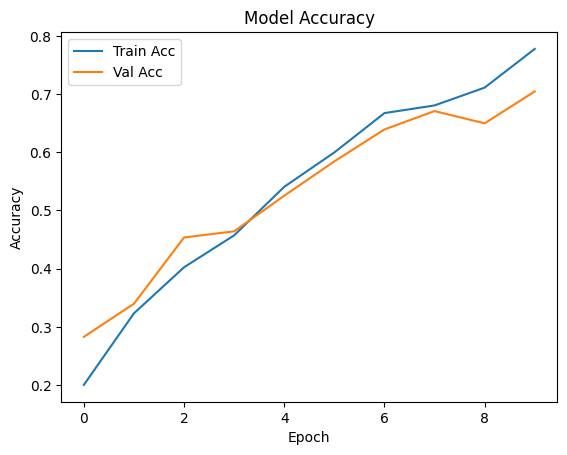

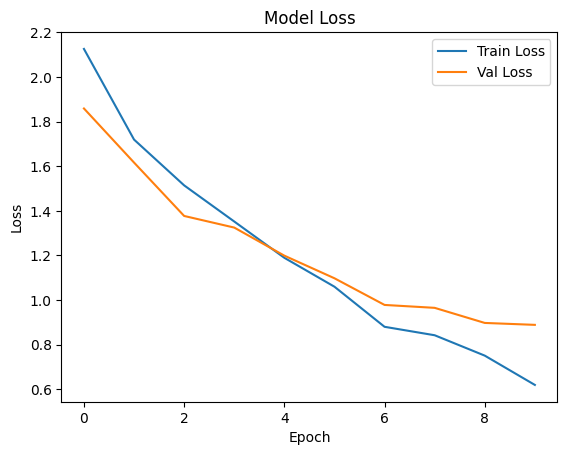

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f" Test Accuracy: {test_accuracy * 100:.2f}%")


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7004 - loss: 0.8621
 Test Accuracy: 70.46%


In [ ]:
model.save('/content/chess_cnn_model.h5')
print(" Model saved as chess_cnn_model.h5")


 Model saved as chess_cnn_model.h5


In [22]:

import cv2
import numpy as np

img_path = '/content/chess_images/train/white_queen/white_queen_1_E3.png'
img = cv2.imread(img_path)
img = cv2.resize(img, (64, 64))
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
predicted_class = le.inverse_transform([np.argmax(prediction)])

print(f" Predicted Class: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
 Predicted Class: white_bishop


In [19]:
import matplotlib.pyplot as plt
import cv2

for i in range(len(df)):
    img_path = "/content/chess_images/" + df.loc[i, 'filename']
    label = df.loc[i, 'label']

    img = cv2.imread(img_path)
    if img is None:
        print(f"Image not found: {img_path}")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


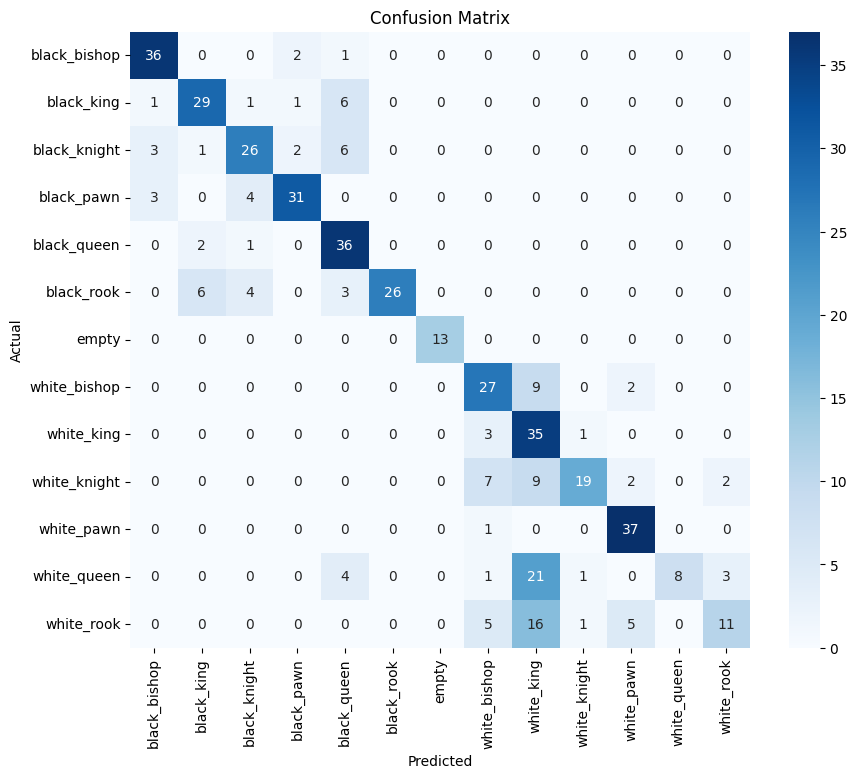

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
report = classification_report(y_true_classes, y_pred_classes, target_names=le.classes_)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

black_bishop       0.84      0.92      0.88        39
  black_king       0.76      0.76      0.76        38
black_knight       0.72      0.68      0.70        38
  black_pawn       0.86      0.82      0.84        38
 black_queen       0.64      0.92      0.76        39
  black_rook       1.00      0.67      0.80        39
       empty       1.00      1.00      1.00        13
white_bishop       0.61      0.71      0.66        38
  white_king       0.39      0.90      0.54        39
white_knight       0.86      0.49      0.62        39
  white_pawn       0.80      0.97      0.88        38
 white_queen       1.00      0.21      0.35        38
  white_rook       0.69      0.29      0.41        38

    accuracy                           0.70       474
   macro avg       0.78      0.72      0.71       474
weighted avg       0.77      0.70      0.69       474

